In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

1. Load the dataset

In [4]:
url = 'https://drive.google.com/uc?id=190t0KiKqSdbFl-o_6r3S9Tvwo2mHzrcB'
df = pd.read_csv(url)


Perform visualization
(A) univariate analysis
analyze a categorical variable

Categorical Variable: survived
0    549
1    342
Name: survived, dtype: int64


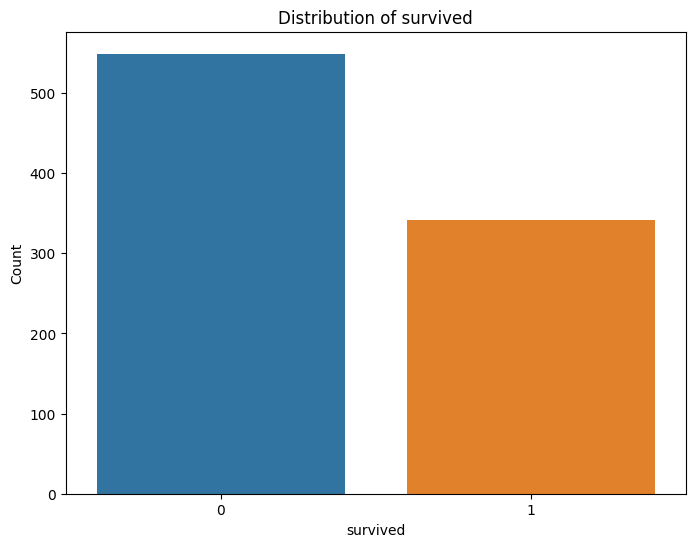

Categorical Variable: pclass
3    491
1    216
2    184
Name: pclass, dtype: int64


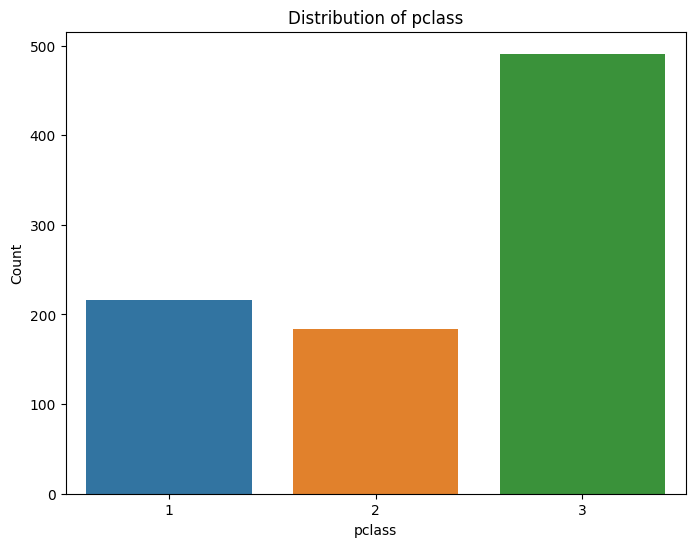

Categorical Variable: sex
male      577
female    314
Name: sex, dtype: int64


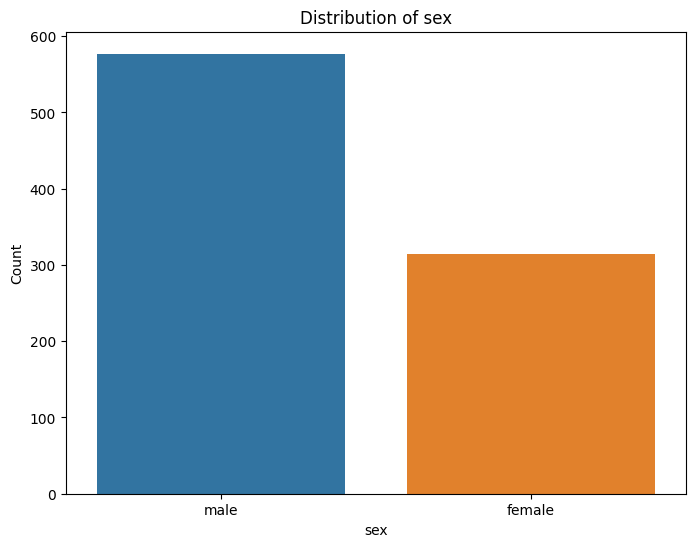

Categorical Variable: embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64


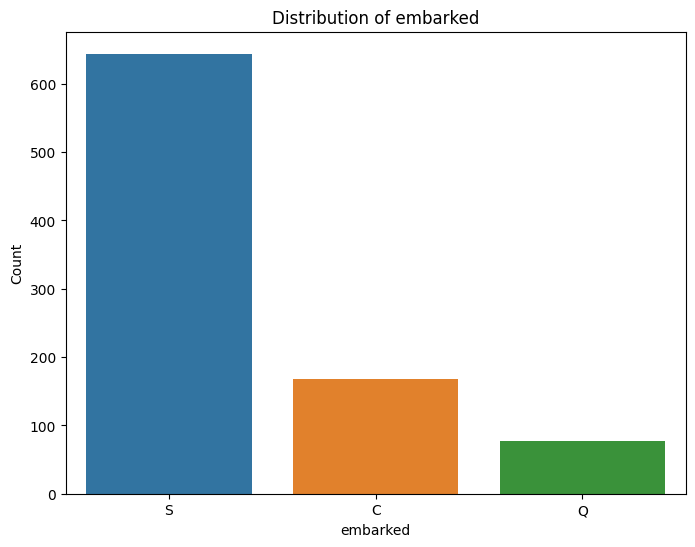

In [5]:
categorical_columns = ['survived', 'pclass', 'sex', 'embarked']
for column in categorical_columns:
    category_counts = df[column].value_counts()
    print(f"Categorical Variable: {column}")
    print(category_counts)
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

analyze a numerical variable

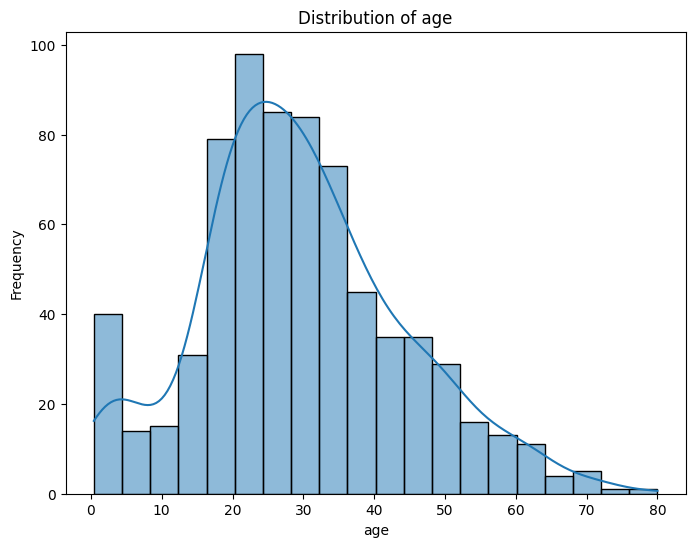

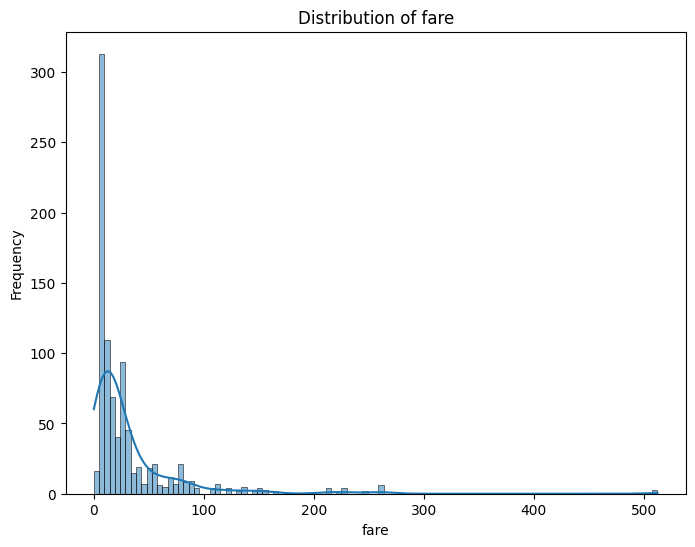

In [6]:
numerical_columns = ['age', 'fare']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()


(b) BI-variate analysis
scaller plot between two numercal variables

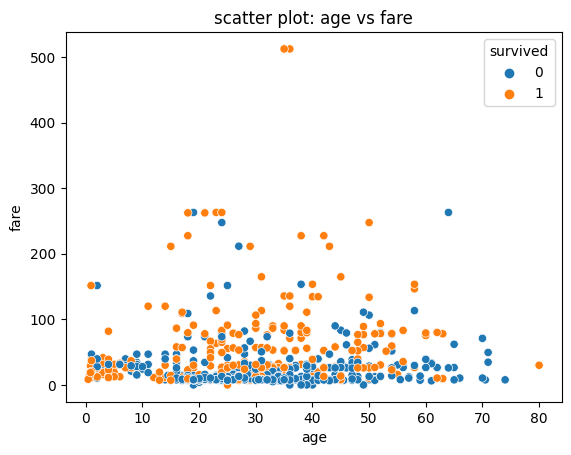

In [7]:
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('scatter plot: age vs fare')
plt.show()


box plot between categorical variable and a numerical variable

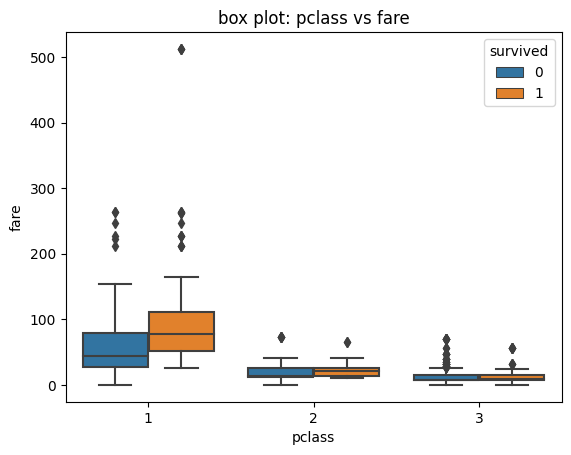

In [8]:
sns.boxplot(x='pclass', y='fare', hue='survived', data=df)
plt.xlabel('pclass')
plt.ylabel('fare')
plt.title('box plot: pclass vs fare')
plt.show()


Multi-variate analysis

Heatmap of correlation matrix between numerical variable

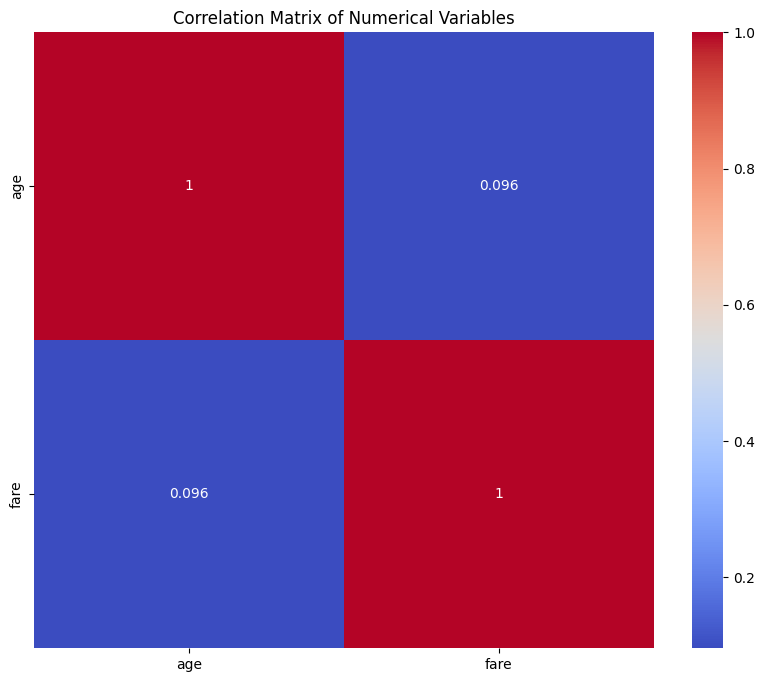

In [9]:
numerical_variables = ['age', 'fare']
correlation_matrix = df[numerical_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

perform descriptive statistics on the dataset

In [37]:
descriptive_stats = df.describe()
print(descriptive_stats)
df.info()


         survived      pclass         age       sibsp       parch        fare
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000
mean     0.675824    1.192308   35.586256    0.467033    0.478022   70.697424
std      0.469357    0.516411   15.574078    0.645007    0.755869   50.664759
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.750000    1.000000    1.000000   90.000000
max      1.000000    3.000000   73.278610    3.000000    4.000000  181.284494
<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     182 non-null    int64  
 1   pclass       182 non-null    int64  
 2   sex          182 non

5. Handle missing values

drop rows with missing values

In [33]:
df_dropped = df.dropna(inplace = True)

In [36]:
df_filled = df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     182 non-null    int64  
 1   pclass       182 non-null    int64  
 2   sex          182 non-null    object 
 3   age          182 non-null    float64
 4   sibsp        182 non-null    int64  
 5   parch        182 non-null    int64  
 6   fare         182 non-null    float64
 7   embarked     182 non-null    object 
 8   class        182 non-null    object 
 9   who          182 non-null    object 
 10  adult_male   182 non-null    bool   
 11  deck         182 non-null    object 
 12  embark_town  182 non-null    object 
 13  alive        182 non-null    object 
 14  alone        182 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 20.3+ KB


<ipython-input-36-228e9d263c0c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean(), inplace = True)


6. Find and replace outlines (using z-score method)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.688694,0.523008,0.381594,30.003893
std,0.486592,0.836071,14.492933,1.102743,0.806057,36.989591
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,73.278610,8.000000,6.000000,181.284494


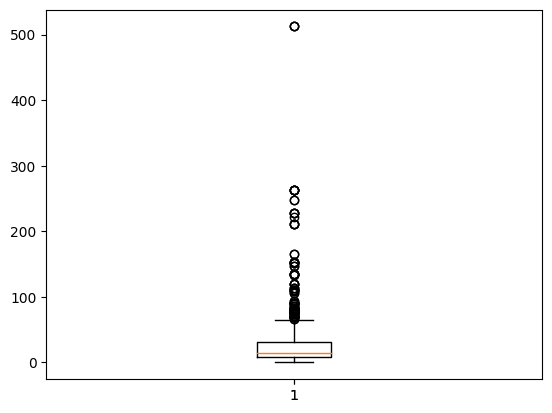

In [19]:
plt.boxplot(df['age'])
plt.boxplot(df['fare'])
upper = df['age'].mean() + 3*df['age'].std()
lower = df['age'].mean() - 3*df['age'].std()
lower,upper
df['age'] = np.where(df['age']>upper,upper,np.where(df['age']<lower,lower,df['age']))
df.describe()
upper1 = df['fare'].mean() + 3*df['fare'].std()
lower1 = df['fare'].mean() - 3*df['fare'].std()
upper1,lower1
df['fare'] = np.where(df['fare']>upper1,upper1,np.where(df['fare']<lower1,lower1,df['fare']))
df.describe()

7. Check for Categorical columns and perform encoding

In [14]:
categorical_columns = ['sex', 'embarked']
df_encoded = pd.get_dummies(df_filled, columns=categorical_columns, drop_first=True)

8. Split the data into dependent and independent variables

In [27]:
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

9. Scale the independent variables

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: ignored

10. Split the data into training and testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

NameError: ignored

Print a sample of the processed data

In [25]:
print("Sample of the processed data:")
print(df_encoded.head())

Sample of the processed data:
   survived  pclass   age  sibsp  parch     fare  class    who  adult_male  \
0         0       3  22.0      1      0   7.2500  Third    man        True   
1         1       1  38.0      1      0  71.2833  First  woman       False   
2         1       3  26.0      0      0   7.9250  Third  woman       False   
3         1       1  35.0      1      0  53.1000  First  woman       False   
4         0       3  35.0      0      0   8.0500  Third    man        True   

  deck  embark_town alive  alone  sex_male  embarked_Q  embarked_S  
0  NaN  Southampton    no  False         1           0           1  
1    C    Cherbourg   yes  False         0           0           0  
2  NaN  Southampton   yes   True         0           0           1  
3    C  Southampton   yes  False         0           0           1  
4  NaN  Southampton    no   True         1           0           1  
